In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from hydramuscle.model.force_encoder_ecto import ForceEncoderEcto
from hydramuscle.model.force_encoder_endo import ForceEncoderEndo
import hydramuscle.utils.utils as utils

In [2]:
NUMX = 30
NUMY = 60

In [3]:
# Load calcium
FILENAME = "2020-09-28-23-41-19-017767"
# FILENAME = "2020-09-01-16-40-34-349650"

calcium = pd.read_hdf("./results/data/calcium/" + FILENAME + ".h5")
calcium = calcium.values.reshape(len(calcium), NUMX*2, NUMY)

In [4]:
# Separate ecto and endo
ca_ecto = calcium[:, :NUMX, :]
ca_endo = calcium[:, NUMX:, :]

In [11]:
# Encode force
FILENAME = "017767_k_33_03"
# FILENAME = "156006_same_layers"

fo_ecto = utils.encode_force_2d(ForceEncoderEcto, ca_ecto, NUMX, NUMY, 0.02, save_interval=5)
fo_endo = utils.encode_force_2d(ForceEncoderEndo, ca_endo, NUMX, NUMY, 0.02, save_interval=5)

100%|██████████| 30000/30000 [00:06<00:00, 4394.03it/s]


In [12]:
# Average force and save
fo_ecto_avg = utils.average_force(fo_ecto, NUMX, NUMY, 10, 20)
df = pd.DataFrame(fo_ecto_avg.reshape(-1, 200))
df.to_csv("./results/data/force/" + FILENAME + "_ecto.csv", index = False)

fo_endo_avg = utils.average_force(fo_endo, NUMX, NUMY, 10, 20)
df = pd.DataFrame(fo_endo_avg.reshape(-1, 200))
df.to_csv("./results/data/force/" + FILENAME + "_endo.csv", index = False)

In [13]:
# Load to double check / compare
fo_ = pd.read_csv("./results/data/force/" + FILENAME + "_ecto" + ".csv")
fo_ = fo_.values.reshape(-1, 10, 20)

fo = pd.read_csv("./results/data/force/" + FILENAME + "_endo" + ".csv")
fo = fo.values.reshape(-1, 10, 20)

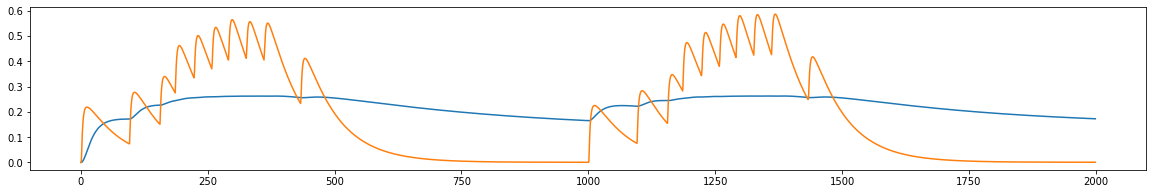

In [14]:
plt.figure(figsize=(20,3))
plt.plot(fo[:2000, 5, 10])
# plt.plot(fo_[:2000, 5, 10])
plt.plot(fo_[:2000, 5, 10])
plt.show()

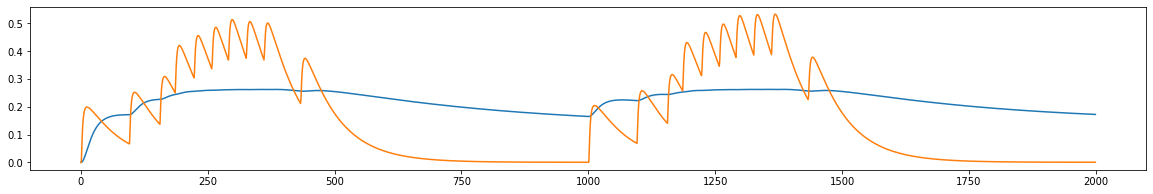

In [10]:
# Load to double check / compare

FILENAME = "349650_k3_16_k4_4_chalf_085"

fo_ = pd.read_csv("./results/data/force/" + FILENAME + "_ecto" + ".csv")
fo_ = fo_.values.reshape(-1, 10, 20)

fo = pd.read_csv("./results/data/force/" + FILENAME + "_endo" + ".csv")
fo = fo.values.reshape(-1, 10, 20)

plt.figure(figsize=(20,3))
plt.plot(fo[:2000, 5, 10])
# plt.plot(fo_[:2000, 5, 10])
plt.plot(fo_[:2000, 5, 10])
plt.show()

In [20]:
# plt.figure(figsize=(10,5))
# names = ["k7(endo)_0005", "k7(endo)_003", "k7(endo)_01", "k7(endo)_025", "k7(endo)_05", "k7(endo)_075"]
# for name in names:
#     fo = pd.read_csv("./results/data/force/" + name + "_endo" + ".csv")
#     fo = fo.values.reshape(-1, 10, 20)
#     plt.plot(fo[:, 5, 10], label=name, linewidth=3)
# plt.legend(loc="upper right")
# plt.show()

In [21]:
# plt.figure(figsize=(10,5))
# names = ["chalf(endo)_005", "chalf(endo)_025", "chalf(endo)_05", "chalf(endo)_075"]
# for name in names:
#     fo = pd.read_csv("./results/data/force/" + name + "_endo" + ".csv")
#     fo = fo.values.reshape(-1, 10, 20)
#     plt.plot(fo[:, 5, 10], label=name, linewidth=3)
# plt.legend(loc="upper right")
# plt.show()